In [1]:
#step 4: pretty graphs

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('all_data.csv')

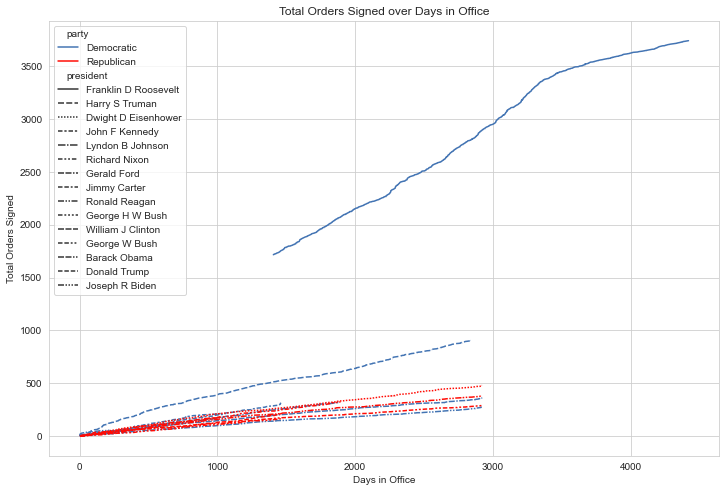

In [3]:
fig, ax = plt.subplots(figsize = (12,8))

sns.lineplot(x='days', y='count', data=df, hue='party', style='president', palette=sns.color_palette(['#4374B3', '#FF0B04']))
plt.title('Total Orders Signed over Days in Office')
plt.xlabel('Days in Office')
plt.ylabel('Total Orders Signed')
plt.savefig('img_full_plot.png', bbox_inches='tight')
plt.show()

In [4]:
df_subset = df[df['president'] != 'Franklin D Roosevelt']

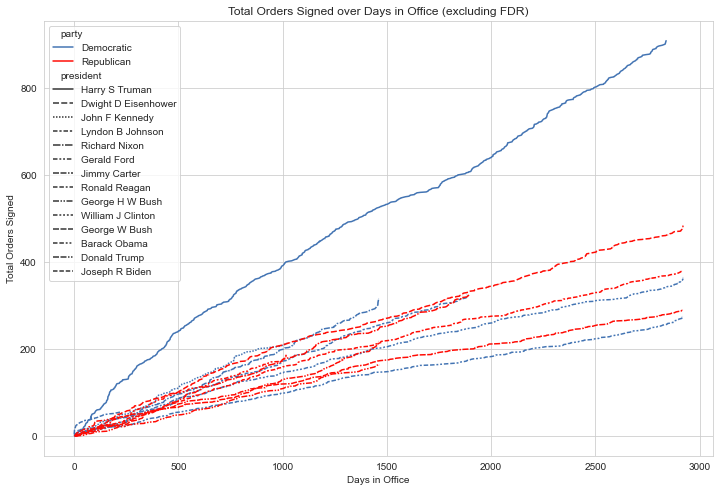

In [5]:
fig, ax = plt.subplots(figsize = (12,8))

sns.lineplot(x='days', y='count', data=df_subset, hue='party', style='president', palette=sns.color_palette(['#4374B3', '#FF0B04']))
plt.title('Total Orders Signed over Days in Office (excluding FDR)')
plt.xlabel('Days in Office')
plt.ylabel('Total Orders Signed')
plt.savefig('img_sans_FDR.png', bbox_inches='tight')
plt.show()

In [6]:
df_subsub = df_subset[df_subset['president'] != 'Harry S Truman']

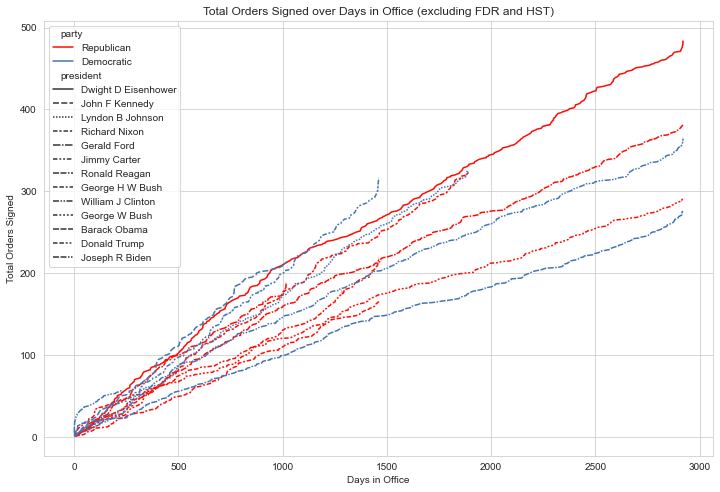

In [7]:
fig, ax = plt.subplots(figsize = (12,8))

sns.lineplot(x='days', y='count', data=df_subsub, hue='party', style='president', palette=sns.color_palette(['#FF0B04', '#4374B3']))
plt.title('Total Orders Signed over Days in Office (excluding FDR and HST)')
plt.xlabel('Days in Office')
plt.ylabel('Total Orders Signed')
plt.savefig('img_sans_FDR_HST.png', bbox_inches='tight')
plt.show()

In [8]:
preses = df.president.unique()
print(preses)

['Franklin D Roosevelt' 'Harry S Truman' 'Dwight D Eisenhower'
 'John F Kennedy' 'Lyndon B Johnson' 'Richard Nixon' 'Gerald Ford'
 'Jimmy Carter' 'Ronald Reagan' 'George H W Bush' 'William J Clinton'
 'George W Bush' 'Barack Obama' 'Donald Trump' 'Joseph R Biden']


In [26]:
totals = df.groupby(['president', 'party'])[['days', 'count']].max().reset_index(level='party')
totals = totals.reindex(preses).reset_index()
totals['years'] = totals['days'] / 365
totals['OPY'] = totals['count'] / totals['years']
print(totals)

df_first_100 = df[df['days'] <= 100]
first_100 = df_first_100.groupby(['president', 'party'])[['days', 'count']].max().reset_index(level='party')
first_100 = first_100.reindex(preses).reset_index()
print(first_100)

               president       party  days   count      years         OPY
0   Franklin D Roosevelt  Democratic  4421  3740.0  12.112329  308.776295
1         Harry S Truman  Democratic  2839   908.0   7.778082  116.738288
2    Dwight D Eisenhower  Republican  2920   484.0   8.000000   60.500000
3         John F Kennedy  Democratic  1023   214.0   2.802740   76.353861
4       Lyndon B Johnson  Democratic  1885   325.0   5.164384   62.931034
5          Richard Nixon  Republican  1893   325.0   5.186301   62.665082
6            Gerald Ford  Republican  1016   190.0   2.783562   68.257874
7           Jimmy Carter  Democratic  1460   320.0   4.000000   80.000000
8          Ronald Reagan  Republican  2920   381.0   8.000000   47.625000
9        George H W Bush  Republican  1460   166.0   4.000000   41.500000
10     William J Clinton  Democratic  2920   366.0   8.000000   45.750000
11         George W Bush  Republican  2918   291.0   7.994521   36.399931
12          Barack Obama  Democratic  

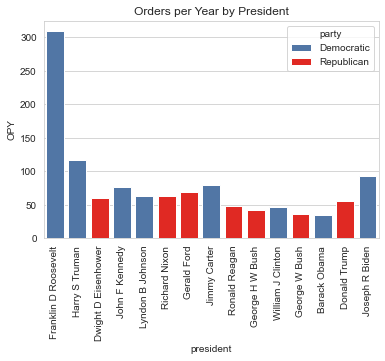

In [35]:
sns.barplot(x = 'president', y = 'OPY', data = totals, hue = 'party', palette = sns.color_palette(['#4374B3', '#FF0B04']), dodge=False)
plt.title('Orders per Year by President')
plt.xticks(rotation = 90)
plt.savefig('img_opy.png', bbox_inches='tight')
plt.show()

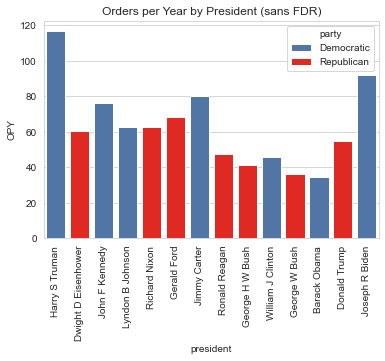

In [37]:
totals_sans_FDR = totals.drop(index=0)
sns.barplot(x = 'president', y = 'OPY', data = totals_sans_FDR, hue = 'party', palette = sns.color_palette(['#4374B3', '#FF0B04']), dodge=False)
plt.title('Orders per Year by President (sans FDR)')
plt.savefig('img_opy.png', bbox_inches='tight')
plt.xticks(rotation = 90)
plt.savefig('img_opy_sans_FDR.png', bbox_inches='tight')
plt.show()

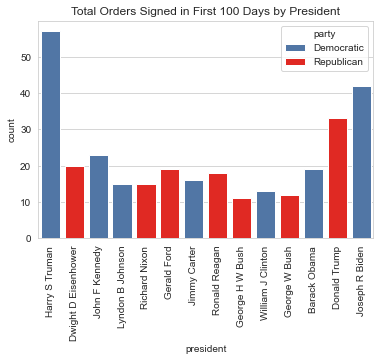

In [39]:
first_100 = first_100.drop(index=0)
sns.barplot(x = 'president', y = 'count', data = first_100, hue = 'party', palette = sns.color_palette(['#4374B3', '#FF0B04']), dodge=False)
plt.title('Total Orders Signed in First 100 Days by President')
plt.savefig('img_opy.png', bbox_inches='tight')
plt.xticks(rotation = 90)
plt.savefig('img_first_100.png', bbox_inches='tight')
plt.show()

In [44]:
both = totals_sans_FDR.merge(first_100, on=['president', 'party'], suffixes = ('_total', '_first_100'))
print(both)

              president       party  days_total  count_total     years  \
0        Harry S Truman  Democratic        2839        908.0  7.778082   
1   Dwight D Eisenhower  Republican        2920        484.0  8.000000   
2        John F Kennedy  Democratic        1023        214.0  2.802740   
3      Lyndon B Johnson  Democratic        1885        325.0  5.164384   
4         Richard Nixon  Republican        1893        325.0  5.186301   
5           Gerald Ford  Republican        1016        190.0  2.783562   
6          Jimmy Carter  Democratic        1460        320.0  4.000000   
7         Ronald Reagan  Republican        2920        381.0  8.000000   
8       George H W Bush  Republican        1460        166.0  4.000000   
9     William J Clinton  Democratic        2920        366.0  8.000000   
10        George W Bush  Republican        2918        291.0  7.994521   
11         Barack Obama  Democratic        2919        276.0  7.997260   
12         Donald Trump  Republican   

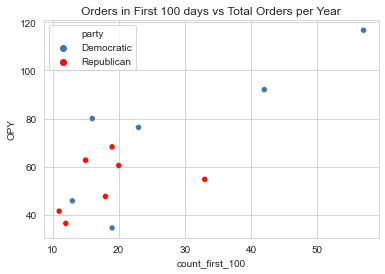

In [45]:
sns.scatterplot(x = 'count_first_100', y = 'OPY', data = both, hue = 'party', palette = sns.color_palette(['#4374B3', '#FF0B04']))                
plt.title('Orders in First 100 days vs Total Orders per Year')
plt.savefig('img_first100_vs_opy.png', bbox_inches='tight')
plt.show()